# Car Features Analysis

### Import Libraries

In [17]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('../Datasets/car-features.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [20]:
df.shape

(11914, 16)

In [21]:
df = df.drop(['Engine Fuel Type','Market Category','Vehicle Style','Popularity','Number of Doors','Vehicle Size'],axis = 1)


In [22]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [23]:
df = df.rename(columns={'Engine HP':'HP', 'Engine Cylinders':'Cylinders','Transmission Type':'DriverMode','highway MPG':'MPG-H','MSRP':'Price'})

In [24]:
df = df.drop_duplicates()

In [25]:
df.shape

(10925, 10)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10925 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           10925 non-null  object 
 1   Model          10925 non-null  object 
 2   Year           10925 non-null  int64  
 3   HP             10856 non-null  float64
 4   Cylinders      10895 non-null  float64
 5   DriverMode     10925 non-null  object 
 6   Driven_Wheels  10925 non-null  object 
 7   MPG-H          10925 non-null  int64  
 8   city mpg       10925 non-null  int64  
 9   Price          10925 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 938.9+ KB


In [27]:
df.count()

Make             10925
Model            10925
Year             10925
HP               10856
Cylinders        10895
DriverMode       10925
Driven_Wheels    10925
MPG-H            10925
city mpg         10925
Price            10925
dtype: int64

In [29]:
df.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
DriverMode        0
Driven_Wheels     0
MPG-H             0
city mpg          0
Price             0
dtype: int64

In [30]:
df = df.dropna()

In [31]:
df.count()

Make             10827
Model            10827
Year             10827
HP               10827
Cylinders        10827
DriverMode       10827
Driven_Wheels    10827
MPG-H            10827
city mpg         10827
Price            10827
dtype: int64

In [ ]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


21327.5


In [39]:
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

print('Any value in price below ',lower_bound, 'and above ',upper_bound, 'is treated as outlier')

Any value in price below  -10018.75 and above  75291.25 is treated as outlier


<Axes: xlabel='Price'>

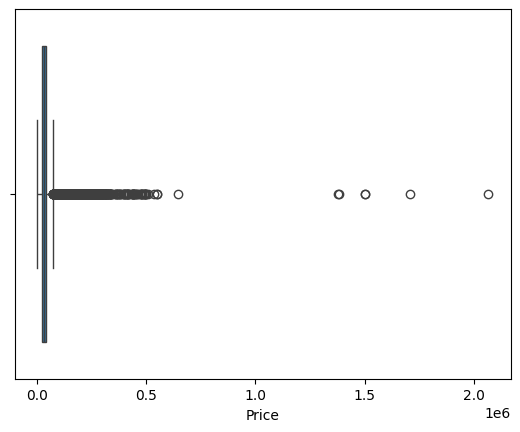

In [36]:
sns.boxplot(x = df['Price'])

Text(0.5, 0, 'Make')

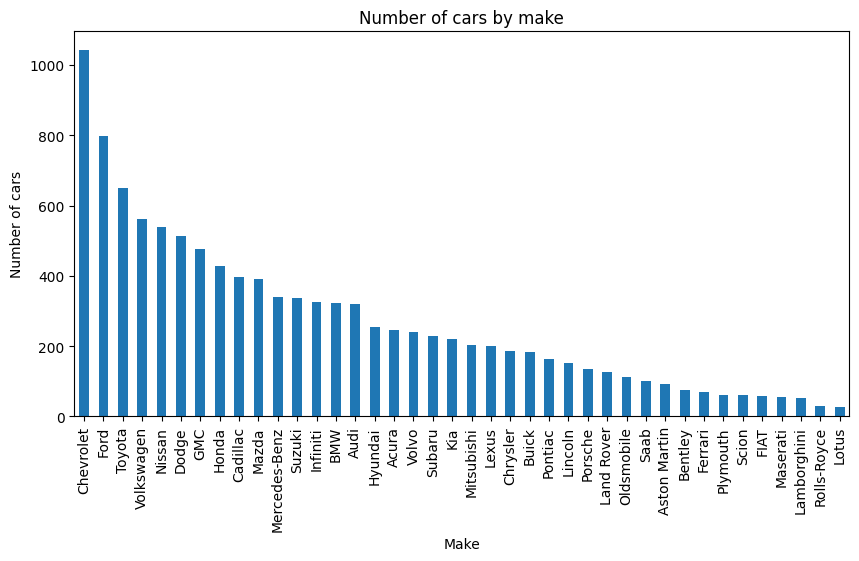

In [41]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10, 5))
plt.title("Number of cars by make")
plt.ylabel("Number of cars")
plt.xlabel("Make")

,Year,HP,Cylinders,MPG-H,city mpg,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG-H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
city mpg,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


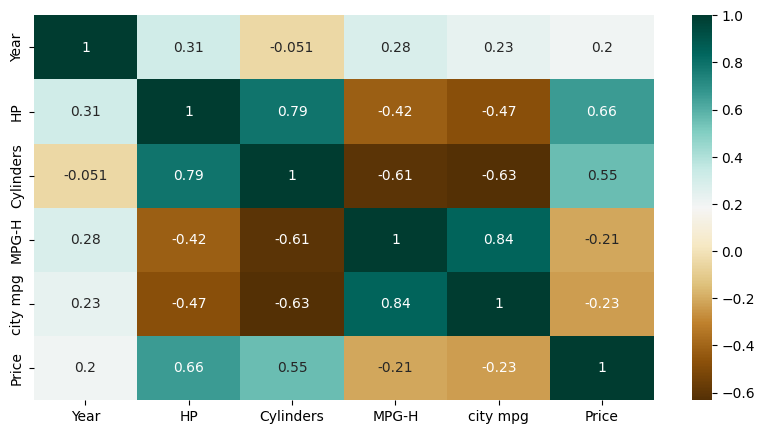

In [50]:
# numeric_df = df.select_dtypes(include=[np.number])
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,5))
c = numeric_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# Scatterplot

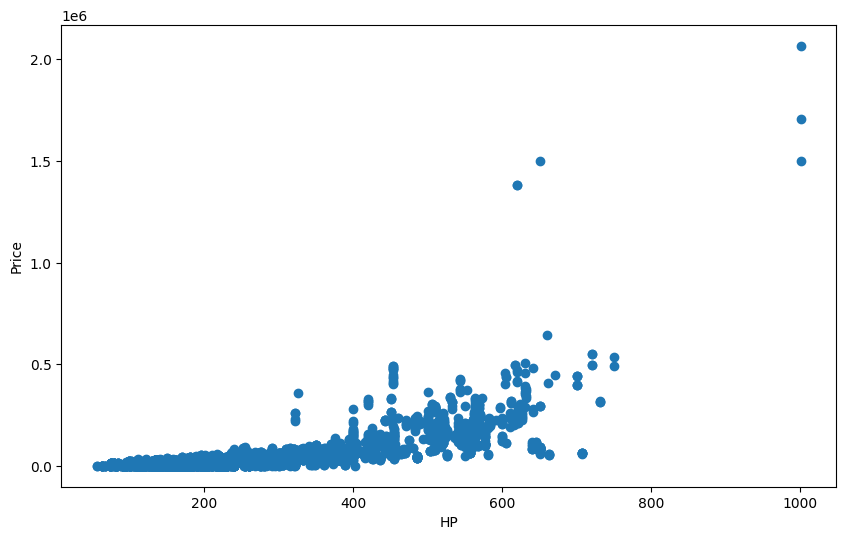

In [51]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(numeric_df['HP'], numeric_df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()